In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm


from scipy import ndimage
from matplotlib import pyplot as plt
import numpy as np

from sklearn import manifold, datasets
from IPython.display import display 
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

%matplotlib inline

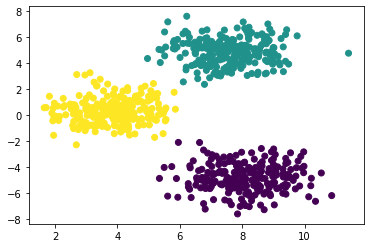

In [2]:
#Create random data
# make_blobs --> generates blobs of points (Gaussian distribution)

x,y = make_blobs(n_samples = 700 , centers = 3, n_features= 2, random_state= 150)

# Plot the data distribution (ground truth) 
plt.scatter(x[:,0], x[:,1], c=y)

In [3]:
# Performing K-means clustering on the data
# Parameters:
kmeans = KMeans(n_clusters = 3, init ='random', random_state = 200, verbose=True).fit(x)

Initialization complete
Iteration 0, inertia 6317.016628540867
Iteration 1, inertia 2018.55447353161
Iteration 2, inertia 1402.400365474647
Iteration 3, inertia 1400.930660569271
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 2719.754103510073
Iteration 1, inertia 1401.0067321523636
Converged at iteration 1: center shift 0.0003259937806642893 within tolerance 0.0010655558823348627.
Initialization complete
Iteration 0, inertia 9841.322615955425
Iteration 1, inertia 6431.620102095784
Iteration 2, inertia 6344.730914484329
Iteration 3, inertia 6180.620662228107
Iteration 4, inertia 5484.555484936006
Iteration 5, inertia 2771.7551456995348
Iteration 6, inertia 1407.887945931428
Iteration 7, inertia 1400.930660569271
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 11754.747597919879
Iteration 1, inertia 3964.9734146427722
Iteration 2, inertia 1418.6005070830197
Iteration 3, inertia 1401.0282039579827
Conv

In [4]:
# Retrieve predictions and cluster centers (centroids).
display(kmeans.labels_)

array([2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2,
       2, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 2,
       1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2,
       0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2,
       1, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0,
       2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2,
       1, 2, 2, 1, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1,
       2, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1,
       1, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0,
       1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 1, 2,
       1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0,

In [5]:
display(kmeans.cluster_centers_)

array([[ 8.11736632, -4.86771973],
       [ 7.56005688,  4.81557415],
       [ 3.80157867,  0.31369009]])

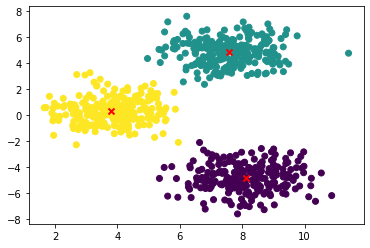

In [6]:
# Plot the predictions.
plt.scatter(x[:,0], x[:,1], c= kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c = 'r',marker ='x', linewidths=2)

In [7]:
# We can make new predictions without re-run kmeans (simpily find nearest centroids).

x_new = np.array([[2,3],[-1,19],[2,-8]])
y_pred = kmeans.predict(x_new)

display(y_pred)

array([2, 1, 0])

In [8]:
# Get distances from data point to every centroid
kmeans.transform(x_new)

array([[ 9.96610176,  5.84897786,  3.23449326],
       [25.54984175, 16.56721191, 19.29334952],
       [ 6.87265235, 13.96972346,  8.50665202]])

##### Problems with K-Means

 Choosing a value for K

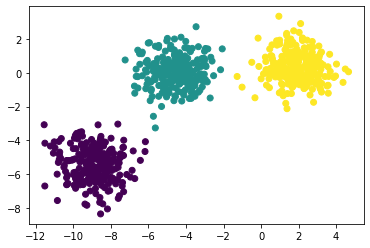

In [9]:
# Generate data new data with make_blobs
x1,y1 = make_blobs(n_samples = 700 , centers = 3, n_features= 2, random_state= 170)

plt.scatter(x1[:,0], x1[:,1], c=y1)

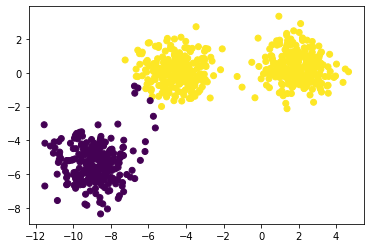

In [10]:
# Run k-means, Number of clusters = 2
y1_predict = KMeans(n_clusters = 2, random_state = 170).fit_predict(x1)

#plot 

plt.scatter(x1[:,0], x1[:,1], c =y1_predict)

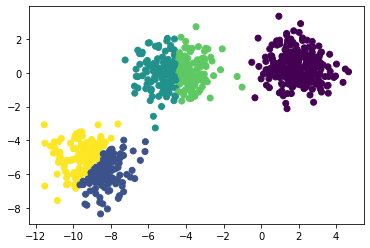

In [11]:
# Run k-means, Number of clusters = 5
y2_predict = KMeans(n_clusters = 5, random_state = 170).fit_predict(x1)

#plot 

plt.scatter(x1[:,0], x1[:,1], c =y2_predict)

##### How can we find the best k?

In [12]:
sse = []


for k in range(1,11):
    mkmeans = KMeans(n_clusters = k , random_state =170)
    mkmeans.fit(x1)
    sse.append(mkmeans.inertia_)

C:\Users\nmoba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


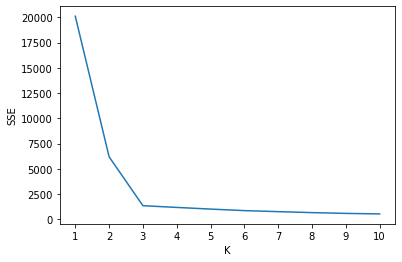

In [13]:
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

C:\Users\nmoba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


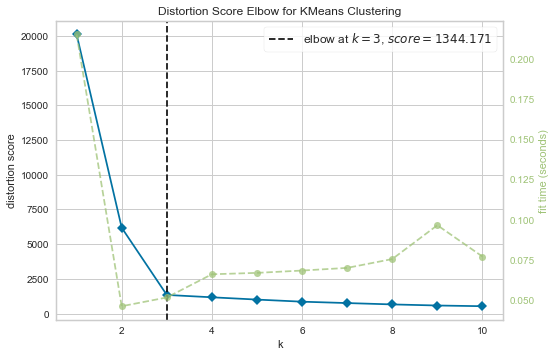

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
#alternative method 

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(x1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [15]:
# Using silhouette
sil =[]

for k in range(2,11):
    mkmeans2 = KMeans(n_clusters = k , random_state =170)
    mkmeans2.fit(x1)
    score = metrics.silhouette_score(x1, mkmeans2.labels_)
    sil.append(score)
    


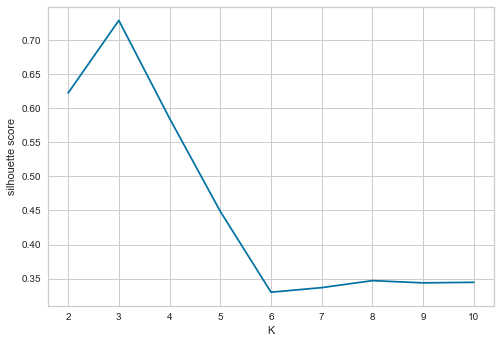

In [16]:
plt.plot(range(2,11), sil)
plt.xticks(range(2,11))
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

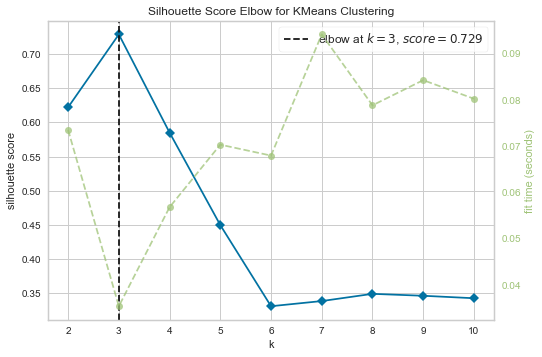

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [17]:
#alternative method

# Instantiate the clustering model and visualizer
# you can hide the timing by timings=false
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11) , metric ='silhouette')

visualizer.fit(x1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

##### DBSCAN and non spherical shapes

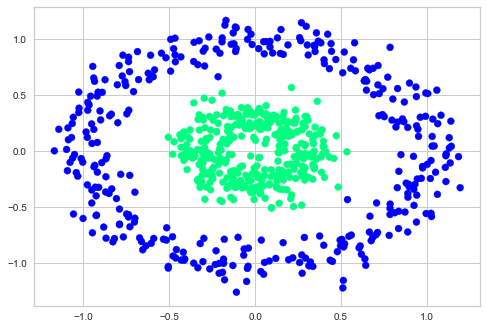

In [18]:
# Generate non-spherical data.
x2, y2 = make_circles (n_samples = 700 , factor =0.3, noise = 0.1)

plt.scatter(x2[:,0], x2[:,1], c =y2, cmap='winter')

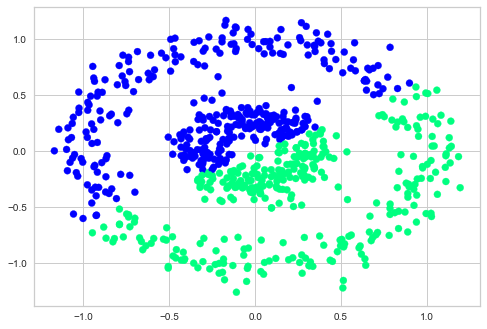

In [19]:
# Run k-means on non-spherical data.
y3_predict = KMeans(n_clusters=2, random_state=170).fit_predict(x2)

# Plot the predictions.
plt.scatter(x2[:,0], x2[:,1], c=y3_predict , cmap ='winter')

In [20]:
# Print the evaluations
print(metrics.silhouette_score(x2, y3_predict))

0.29412910206393683


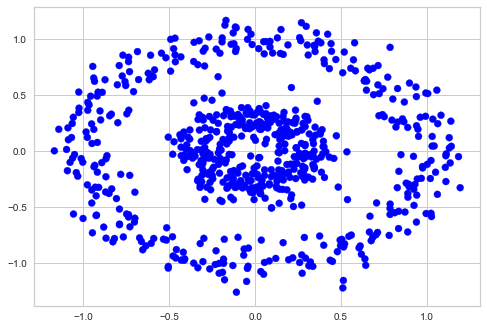

In [21]:
# Perform DBSCAN on the data
y4_predict = DBSCAN(eps=0.2 , min_samples=5).fit_predict(x2)

# Plot the predictions.
plt.scatter(x2[:,0], x2[:,1], c=y4_predict , cmap ='winter')

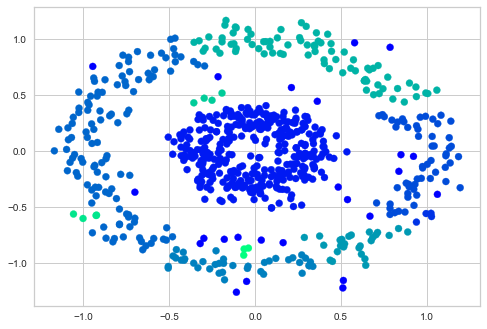

In [23]:
# setting hyperparameters
y5_predict = DBSCAN(eps=0.1 , min_samples=3).fit_predict(x2)

# Plot the predictions.
plt.scatter(x2[:,0], x2[:,1], c=y5_predict , cmap ='winter')

In [24]:


X, y = datasets.load_digits(return_X_y=True)
n_samples, n_features = X.shape

np.random.seed(0)

print(X.shape)

(1797, 64)


ward


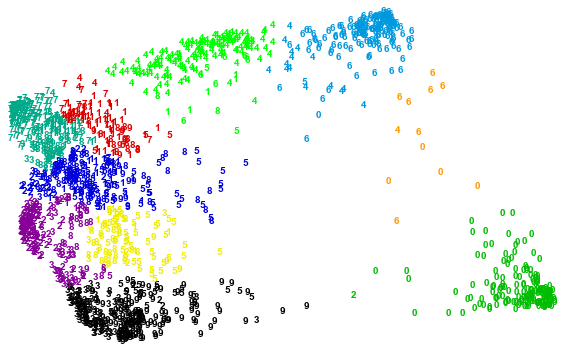

average


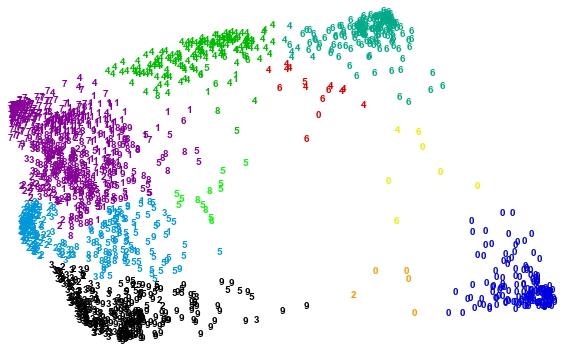

complete


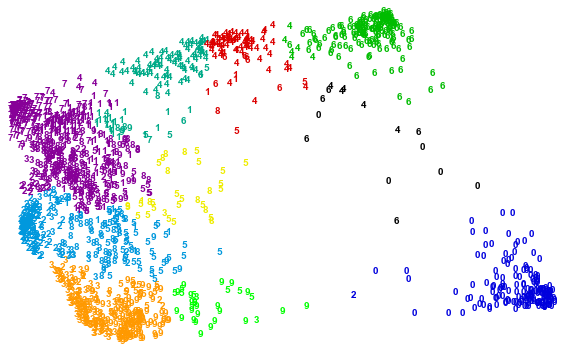

single


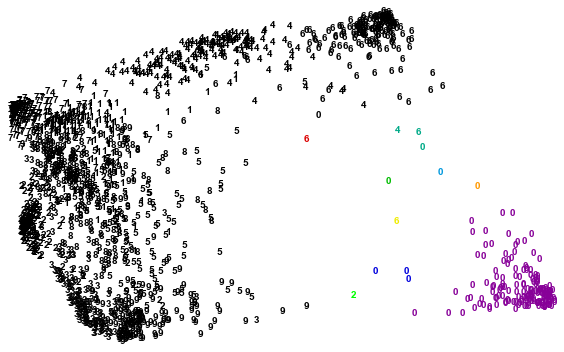

In [25]:

def plot_cluster(X, labels):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min ) / (x_max - x_min)
    
    for i in range(X.shape[0]):
        plt.text(X[i,0], X[i,1], str(y[i]),
                 color = plt.cm.nipy_spectral(labels[i]/10.),
                 fontdict ={'weight' : 'bold', 'size' :10})
        
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    clustering.fit(X_red)
    print(linkage)
    plot_cluster(X_red, clustering.labels_)
   